# Study friend information

This notebook looks at the players friend information. Distinct because it goes up the tree.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
api_calls_day = pd.Timestamp('2019-06-13')
churn_cutoff = api_calls_day - pd.Timedelta(3,'M')

In [3]:
df = pd.read_csv("player_friend_info_100k.csv",dtype={'steamid': str}).drop("Unnamed: 0", axis='columns')

In [4]:
df = df[pd.to_datetime(df['friend_since'], unit='s') < churn_cutoff]

In [5]:
df.head()

,friend_since,relationship,steamid,steamid_orig
0,1434524498,friend,76561198007070703,76561198199710782
1,1437740667,friend,76561198041503217,76561198199710782
2,1438264541,friend,76561198238259518,76561198199710782
3,1421677696,friend,76561197960448312,76561198049785932
4,1490267324,friend,76561197961426758,76561198049785932


In [6]:
df.tail()

,friend_since,relationship,steamid,steamid_orig
12809033,1430381009,friend,76561198085000180,76561197993657300
12809034,1377253788,friend,76561198104092292,76561197993657300
12809035,1377874220,friend,76561198104117721,76561197993657300
12809036,1429293646,friend,76561198138606214,76561197993657300
12809037,1428864612,friend,76561198181799839,76561197993657300


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12308178 entries, 0 to 12809037
Data columns (total 4 columns):
friend_since    int64
relationship    object
steamid         object
steamid_orig    int64
dtypes: int64(2), object(2)
memory usage: 469.5+ MB


In [8]:
df['steamid'].nunique()

5893633

In [9]:
df['steamid_orig'].nunique()

85357

In [10]:
df['relationship'].nunique()

1

In [11]:
df = df.drop('relationship',axis='columns')

In [12]:
df['Root'] = (df['steamid_orig'] == 76561197960434622)

In [15]:
df[df['Root']].head()

,friend_since,steamid,steamid_orig,Root
5035791,1253251937,76561197960265738,76561197960434622,True
5035792,1361927255,76561197960265740,76561197960434622,True
5035793,1238207048,76561197960265743,76561197960434622,True
5035794,1518389583,76561197960265754,76561197960434622,True
5035795,1334200510,76561197960265838,76561197960434622,True


In [16]:
df[~df['Root']].head()

,friend_since,steamid,steamid_orig,Root
0,1434524498,76561198007070703,76561198199710782,False
1,1437740667,76561198041503217,76561198199710782,False
2,1438264541,76561198238259518,76561198199710782,False
3,1421677696,76561197960448312,76561198049785932,False
4,1490267324,76561197961426758,76561198049785932,False


In [17]:
First_tier = list(df[df['Root']]['steamid'])

In [18]:
df['First_tier'] = df['steamid_orig'].apply(lambda x: x in First_tier)

In [19]:
Second_tier = list(df[df['First_tier']]['steamid'])

In [20]:
df['Second_tier'] = df['steamid_orig'].apply(lambda x: x in Second_tier)

In [21]:
df['Third_tier'] = ((~df['Second_tier']) & (~df['First_tier']))

In [24]:
df[(~df['Second_tier']) & (~df['First_tier'])].head()

,friend_since,steamid,steamid_orig,Root,First_tier,Second_tier,Third_tier
0,1434524498,76561198007070703,76561198199710782,False,False,False,True
1,1437740667,76561198041503217,76561198199710782,False,False,False,True
2,1438264541,76561198238259518,76561198199710782,False,False,False,True
3,1421677696,76561197960448312,76561198049785932,False,False,False,True
4,1490267324,76561197961426758,76561198049785932,False,False,False,True


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Now count friends other direction

In [27]:
df_num_Friends = (df.groupby('steamid').count()['steamid_orig']).to_frame()

In [28]:
df_num_Friends = df_num_Friends.reset_index()

In [29]:
df_num_Friends.head()

,steamid,steamid_orig
0,76561197960265729,2
1,76561197960265730,7
2,76561197960265731,80
3,76561197960265733,43
4,76561197960265737,3


In [30]:
df_num_Friends['num_Friends_up'] = df_num_Friends['steamid_orig']

In [34]:
df_num_Friends.head()

,steamid,steamid_orig,num_Friends_up
0,76561197960265729,2,2
1,76561197960265730,7,7
2,76561197960265731,80,80
3,76561197960265733,43,43
4,76561197960265737,3,3


In [35]:
df_num_Friends = df_num_Friends.drop('steamid_orig',axis='columns')

In [36]:
df_num_Friends.head()

,steamid,num_Friends_up
0,76561197960265729,2
1,76561197960265730,7
2,76561197960265731,80
3,76561197960265733,43
4,76561197960265737,3


In [37]:
df_num_Friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893633 entries, 0 to 5893632
Data columns (total 2 columns):
steamid           object
num_Friends_up    int64
dtypes: int64(1), object(1)
memory usage: 89.9+ MB


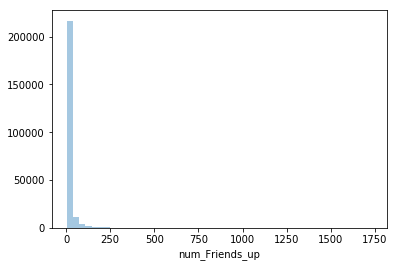

In [55]:
sns.distplot(df_num_Friends[df_num_Friends['num_Friends_up'] > 5]['num_Friends_up'],kde=False)

In [56]:
df_num_Friends.to_csv('100k_friend_num_up.csv')